# **Grupo**

1.   Laura Martínez 
2.   Luis Miguel Ossa
3.   Santiago Trochez



In [29]:
# Basado en https://www.cienciadedatos.net/documentos/py19-pca-python.html

# Tratamiento de datos

# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv("https://raw.githubusercontent.com/Laura-Martinez182/Datasets/main/PCA.csv")

In [31]:
## Dataset
df = df.drop(columns = df.columns[0])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
# Tipos de dato
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [33]:
# Filas y columnas del dataset
df.shape

(1460, 80)

In [34]:
df_copy = df.copy()

In [35]:
# Solo se manejan variables numéricas 
df_copy = df_copy.select_dtypes(exclude=['object'])

In [36]:
df_copy.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [38]:
# Se eliminan los valores nulos
df_copy = df_copy.dropna()

In [39]:
# Se acomoda el index
df_copy = df_copy.reset_index(drop=True)

In [40]:
# Se eliminan columnas
df_copy = df_copy.drop(labels=['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold', 'OverallQual', 'OverallCond'], axis=1)

In [41]:
df_copy.head(10)

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,65.0,8450,196.0,706,0,150,856,856,854,...,2,548,0,61,0,0,0,0,0,208500
1,20,80.0,9600,0.0,978,0,284,1262,1262,0,...,2,460,298,0,0,0,0,0,0,181500
2,60,68.0,11250,162.0,486,0,434,920,920,866,...,2,608,0,42,0,0,0,0,0,223500
3,70,60.0,9550,0.0,216,0,540,756,961,756,...,3,642,0,35,272,0,0,0,0,140000
4,60,84.0,14260,350.0,655,0,490,1145,1145,1053,...,3,836,192,84,0,0,0,0,0,250000
5,50,85.0,14115,0.0,732,0,64,796,796,566,...,2,480,40,30,0,320,0,0,700,143000
6,20,75.0,10084,186.0,1369,0,317,1686,1694,0,...,2,636,255,57,0,0,0,0,0,307000
7,50,51.0,6120,0.0,0,0,952,952,1022,752,...,2,468,90,0,205,0,0,0,0,129900
8,190,50.0,7420,0.0,851,0,140,991,1077,0,...,1,205,0,4,0,0,0,0,0,118000
9,20,70.0,11200,0.0,906,0,134,1040,1040,0,...,1,384,0,0,0,0,0,0,0,129500


In [42]:
df_copy["BsmtFinSF2"].unique

<bound method Series.unique of 0          0
1          0
2          0
3          0
4          0
        ... 
1116       0
1117     163
1118       0
1119    1029
1120     290
Name: BsmtFinSF2, Length: 1121, dtype: int64>

In [43]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
df_copy.mean(axis=0)

----------------------
Media de cada variable
----------------------


MSSubClass           56.146298
LotFrontage          70.665477
LotArea           10122.956289
MasVnrArea          108.487957
BsmtFinSF1          438.399643
BsmtFinSF2           44.589652
BsmtUnfSF           594.125781
TotalBsmtSF        1077.115076
1stFlrSF           1173.584300
2ndFlrSF            353.258698
LowQualFinSF          4.568243
GrLivArea          1531.411240
BsmtFullBath          0.413916
BsmtHalfBath          0.055308
FullBath              1.580731
HalfBath              0.381802
BedroomAbvGr          2.864407
KitchenAbvGr          1.042819
TotRmsAbvGrd          6.576271
Fireplaces            0.603925
GarageYrBlt        1978.399643
GarageCars            1.878680
GarageArea          502.955397
WoodDeckSF           92.610169
OpenPorchSF          46.130241
EnclosedPorch        21.844781
3SsnPorch             3.348796
ScreenPorch          16.100803
PoolArea              2.934880
MiscVal              23.429081
SalePrice        185506.152542
dtype: float64

In [44]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df_copy.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))



,variable_1,variable_2,r,abs_r
703,GarageArea,GarageCars,0.839415,0.839415
673,GarageCars,GarageArea,0.839415,0.839415
255,1stFlrSF,TotalBsmtSF,0.835999,0.835999
225,TotalBsmtSF,1stFlrSF,0.835999,0.835999
569,TotRmsAbvGrd,GrLivArea,0.824312,0.824312


In [45]:
# # (correlación absoluta > 0.8), lo que supone un problema a la hora de emplear modelos de regresión lineal

# División de los datos en train y test
# ==============================================================================
X = df_copy.drop(columns='SalePrice')
y = df_copy['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [46]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)


LinearRegression()

In [47]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 57616.61295085263


In [48]:
# Entrenamiento modelo de regresión precedido por PCA con escalado

# ==============================================================================

pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())

pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])

In [49]:
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [50]:
# Predicciones test
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 57623.25152298063


In [51]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'pca__n_components': [1, 2, 4, 6, 8, 10, 15, 20, 30, 50]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5, random_state=123,shuffle=True), 
        refit      = True,
        verbose    = 0,
        return_train_score = True,
        

       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
3,6,-44765.430761,12456.982723,-44571.750495,3408.581184
4,8,-45398.362160,12332.860131,-43869.976570,3232.242613
2,4,-45658.771136,12540.103457,-45776.023256,3554.653323


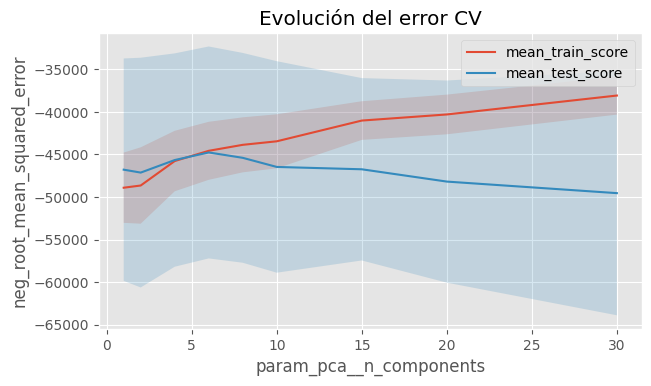

In [52]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [53]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'pca__n_components': 6} : -44765.43076060609 neg_root_mean_squared_error


In [54]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
# ==============================================================================
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=2), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('linearregression', LinearRegression())])

In [55]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
df_copy.mean(axis=0)

----------------------
Media de cada variable
----------------------


MSSubClass           56.146298
LotFrontage          70.665477
LotArea           10122.956289
MasVnrArea          108.487957
BsmtFinSF1          438.399643
BsmtFinSF2           44.589652
BsmtUnfSF           594.125781
TotalBsmtSF        1077.115076
1stFlrSF           1173.584300
2ndFlrSF            353.258698
LowQualFinSF          4.568243
GrLivArea          1531.411240
BsmtFullBath          0.413916
BsmtHalfBath          0.055308
FullBath              1.580731
HalfBath              0.381802
BedroomAbvGr          2.864407
KitchenAbvGr          1.042819
TotRmsAbvGrd          6.576271
Fireplaces            0.603925
GarageYrBlt        1978.399643
GarageCars            1.878680
GarageArea          502.955397
WoodDeckSF           92.610169
OpenPorchSF          46.130241
EnclosedPorch        21.844781
3SsnPorch             3.348796
ScreenPorch          16.100803
PoolArea              2.934880
MiscVal              23.429081
SalePrice        185506.152542
dtype: float64

In [56]:
# Predicciones test
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 43541.35253307472
